A company is trying to predict its sales estimate, based on the amount spent in different advertisting channels - TV, NewsPaper, Radio.

As part of this notebook, I am considering the independent variable TV to predict the sales.

## Importing Libraries

In [1]:
### Data Manipulation Libraries
import numpy as np
import pandas as pd

### Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

###Model Building and Evaluation
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
adversting_data = pd.read_csv("advertising.csv")

## Inspecting Data

In [3]:
adversting_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
adversting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


There are no non-null values in the dataset.<br>
Also, all the variables were assigned the correct datatype.

In [5]:
adversting_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


The variable Newspaper Seems to have a couple of outliers.

## EDA

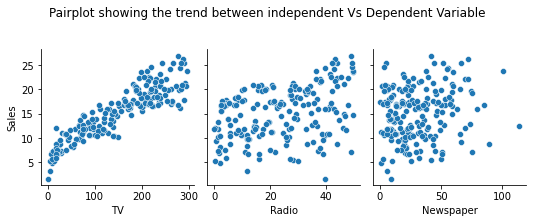

In [6]:
sns.pairplot(adversting_data, x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"])
plt.suptitle("Pairplot showing the trend between independent Vs Dependent Variable", y = 1.2)
plt.show()

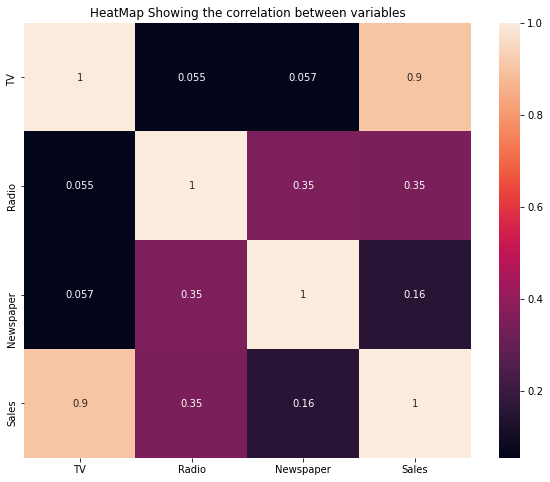

In [7]:
plt.figure(figsize = (10, 8))
sns.heatmap(adversting_data.corr(), annot=True)
plt.title("HeatMap Showing the correlation between variables")
plt.show()

### Checking for Outliers

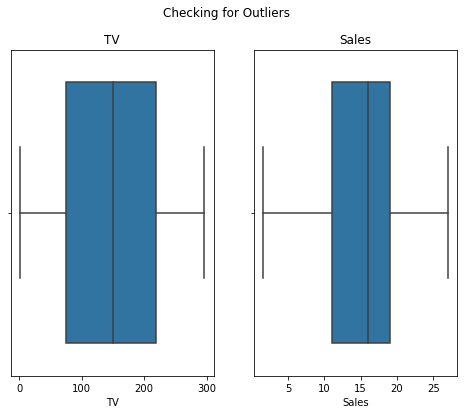

In [8]:
plt.figure(figsize= (8,6))
plt.subplot(1,2,1)
sns.boxplot(adversting_data["TV"])
plt.title("TV")
plt.subplot(1,2,2)
plt.title("Sales")
sns.boxplot(adversting_data["Sales"])
plt.suptitle("Checking for Outliers")
plt.show()

## Getting the features from the data 


In [9]:
X = adversting_data["TV"]
y = adversting_data["Sales"]

## Splitting Data to Train, Test 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 1)

## Model Building Using StatModels Library

In [11]:
### Since statsmodels by default fits a line throught origin, adding constant to the dataset.
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [12]:
model = OLS(y_train, X_train_sm)
model_fit = model.fit()

In [13]:
model_fit.params

const    6.904032
TV       0.055661
dtype: float64

In [14]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     610.3
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.64e-52
Time:                        17:36:37   Log-Likelihood:                -314.76
No. Observations:                 140   AIC:                             633.5
Df Residuals:                     138   BIC:                             639.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9040      0.376     18.356      0.000       6.160       7.648
TV             0.0557      0.002     24.704      0.000       0.051       0.060
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.165
Skew:                          -0.062   Prob(JB):                        0.921
Kurtosis:                       3.114   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- All the p-values are in range. So the co-efficients of the p-values makes sense.
- The Probability of F-Statistic of the model isless than 0.5. So the fitted model is efficient.

### Getting the predictions

In [15]:
y_train_pred = model_fit.predict(X_train_sm)
y_test_pred = model_fit.predict(X_test_sm)

### Plot Predictions Vs train dataset

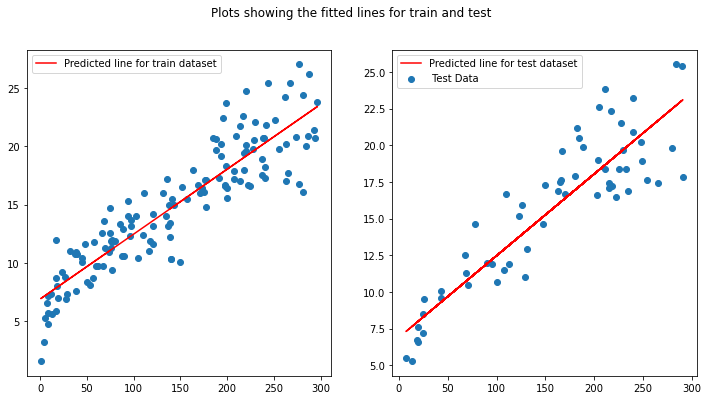

In [16]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.plot(X_train, y_train_pred, color = 'red', label = 'Predicted line for train dataset')
plt.legend(loc = 'best')

plt.scatter(X_train, y_train, label = 'Train Data')
plt.subplot(1,2,2)
plt.plot(X_test, y_test_pred, color = 'red', label = 'Predicted line for test dataset')
plt.scatter(X_test, y_test, label = ' Test Data')
plt.legend(loc = 'best')

plt.suptitle("Plots showing the fitted lines for train and test")
plt.show()

### Model Evaluation

In [17]:
print("The R2 for training data is ", r2_score(y_train_pred, y_train))

The R2 for training data is  0.7738798749832001


In [18]:
print("The R2 for testing data is ",r2_score(y_test_pred, y_test))

The R2 for testing data is  0.7561034030396787


### checking if the assumptions of linear regression holds

#### 1. Error terms are normally distributed

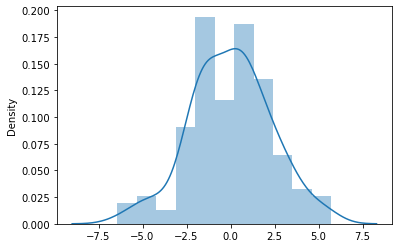

In [19]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

#### 2. Errors terms have constant variance, and independent

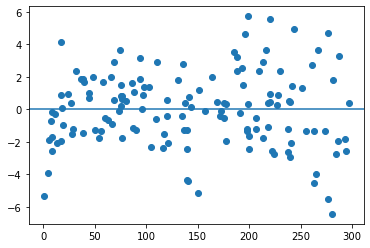

In [20]:
plt.scatter(X_train, res)
plt.axhline(0)

## Bulding model using SKLEARN

In [21]:
### since this is a 1D dataset, reshaping it.
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [22]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [23]:
lr_model.coef_, lr_model.intercept_

(array([0.05566076]), 6.904032471762275)

### Getting the predictions

In [24]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

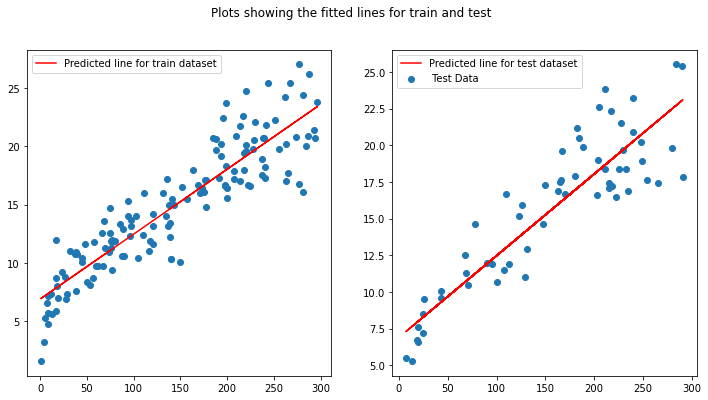

In [25]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.plot(X_train, y_train_pred, color = 'red', label = 'Predicted line for train dataset')
plt.legend(loc = 'best')

plt.scatter(X_train, y_train, label = 'Train Data')
plt.subplot(1,2,2)
plt.plot(X_test, y_test_pred, color = 'red', label = 'Predicted line for test dataset')
plt.scatter(X_test, y_test, label = ' Test Data')
plt.legend(loc = 'best')

plt.suptitle("Plots showing the fitted lines for train and test")
plt.show()

### Model evaluation

In [26]:
r2_score(y_train, y_train_pred)

0.8155807735284488

In [27]:
mean_squared_error(y_train, y_train_pred)

5.252456315115158

In [28]:
r2_score(y_test, y_test_pred)

0.7984701565892567

In [29]:
mean_squared_error(y_test, y_test_pred)

5.143558863773589

### Conclusion: 
From the model built, we could infer that the model is performing better on both the train and test datasets.<br>
R2 of the model is about 81%

Now, we add the other variables to the model to understand the effect of the same.


### Using Multiple Linear Regression:
    

In [30]:
adversting_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [31]:
### Since we are using Multiple Lr, we are scaling the variables
scaler = StandardScaler()
adversting_data = pd.DataFrame(scaler.fit_transform(adversting_data), columns = ["TV", "Radio", "Newspaper", "Sales"])

In [32]:
adversting_data.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455


In [33]:
#### Split the data into train and test
df_train, df_test = train_test_split(adversting_data, train_size= 0.7, random_state = 42)

In [34]:
df_train.shape, df_test.shape

((140, 4), (60, 4))

In [35]:
### Extracting X and Y vars
X_train = df_train.drop("Sales", axis = 1)
y_train = df_train["Sales"]

X_test = df_test.drop("Sales", axis = 1)
y_test = df_test["Sales"]

In [36]:
### Building the model

In [37]:
X_train_sm = sm.add_constant(X_train)

In [38]:
lr = OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [39]:
lr_model.params

const        0.023678
TV           0.870725
Radio        0.288588
Newspaper    0.032692
dtype: float64

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     374.3
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.69e-65
Time:                        17:36:38   Log-Likelihood:                -38.997
No. Observations:                 140   AIC:                             85.99
Df Residuals:                     136   BIC:                             97.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0237      0.028      0.858      0.392      -0.031       0.078
TV             0.8707      0.028     30.937      0.000       0.815       0.926
Radio          0.2886      0.030      9.726      0.000       0.230       0.347
Newspaper      0.0327      0.031      1.064      0.289      -0.028       0.093
==============================================================================
Omnibus:                       11.236   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               18.525
Skew:                          -0.374   Prob(JB):                     9.49e-05
Kurtosis:                       4.618   Cond. No.                         1.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
### checking VIF - 
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif

,Features,VIF
0,TV,1.004677
1,Radio,1.136077
2,Newspaper,1.132084


The variable NewsPaper has high p-value. Hence, dropping the same

In [42]:
X_train_sm.drop("Newspaper", axis = 1, inplace = True)


###building the model again
lr = OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     560.3
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.11e-66
Time:                        17:36:38   Log-Likelihood:                -39.577
No. Observations:                 140   AIC:                             85.15
Df Residuals:                     137   BIC:                             93.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0233      0.028      0.844      0.400      -0.031       0.078
TV             0.8711      0.028     30.936      0.000       0.815       0.927
Radio          0.2993      0.028     10.724      0.000       0.244       0.355
==============================================================================
Omnibus:                       14.690   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.073
Skew:                          -0.479   Prob(JB):                     2.18e-06
Kurtosis:                       4.885   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
### checking VIF - 
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif

,Features,VIF
0,TV,1.004677
1,Radio,1.136077
2,Newspaper,1.132084


In [45]:
y_train_pred = lr_model.predict(X_train_sm)
r2_score(y_train, y_train_pred)

0.8910653983364079

In [46]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.drop("Newspaper", axis = 1, inplace = True)

y_test_pred = lr_model.predict(X_test_sm)
r2_score(y_test, y_test_pred)

0.9139189919346896

In [47]:
### checking the model assumptions

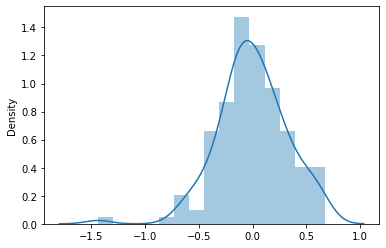

In [48]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

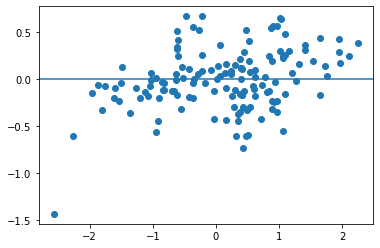

In [49]:
plt.scatter(y_train, res)
plt.axhline(0)

This is an approximately normal distribution. Hence, the assumptions are met.


#### Using Breusch Pagan Test to measure Homoscadesticity

In [50]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(lr_model.resid, lr_model.model.exog)

lzip(names, test)


[('Lagrange multiplier statistic', 0.7710080674188591),
 ('p-value', 0.680107752566053),
 ('f-value', 0.379332291968087),
 ('f p-value', 0.6850346625740136)]

Here, p-value in the Breusch Pagan test is greater than 0.05. Hence, we fail to reject the null hypothesis

### Conclusions:
On adding the number of variables, the performance of the model has improved from 81 to 89%.
Also, from the model it could be seen that "NewsPaper" does not seem to be an efficient mode in improving the sales
